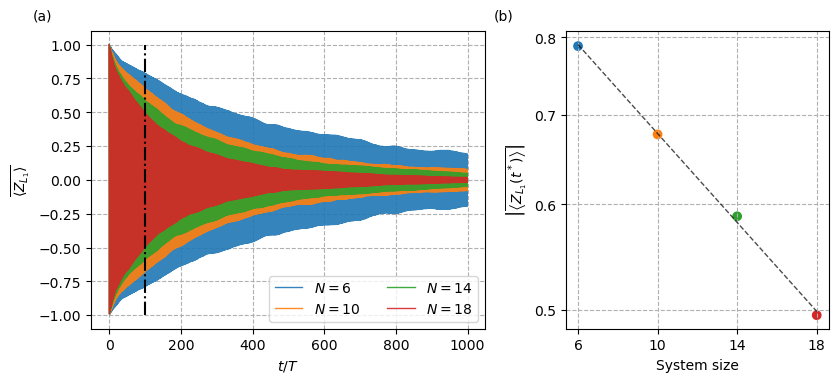

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

plt.rcParams['figure.constrained_layout.use'] = True
a4_size = (11.69, 8.27)
text_size = (11.69*0.8, 8.27)


def StringDecay(idx=200, save=False) :

    data = dict()
    with h5py.File('./figS6.mat', 'r') as data_:
        for it in data_.keys() :
            data[it] = np.array(data_[it])

    cmap = plt.get_cmap('tab10')

    ts = np.arange(0,1000,1)

    fig = plt.figure(figsize=(text_size[1]*1, text_size[1]*0.45))
    ax = plt.subplot2grid(shape=(1, 5), loc=(0, 0), colspan=3)
    ax.text(-0.1, 1.05, '(a)', ha='right', va='center', transform=ax.transAxes, usetex=False)
    for k in range(4) :
        ax.plot(ts, data['Res'][0:2000:2,k], label="$N=%d$" % (4*k+6), c=cmap(k), linewidth=1, markersize=5, alpha=0.9)
        
    ax.plot([idx/2,idx/2],[-1,1],linewidth=1.5,c='k',linestyle='-.')

    ax.grid(linestyle='--')
    ax.set_xlabel("$t/T$")
    ax.set_ylabel(r"$\overline{\langle Z_{L_1}\rangle}$")
    ax.legend(loc=4,ncols=2)

    
    ax = plt.subplot2grid(shape=(1, 5), loc=(0, 3), colspan=2)
    k, b = np.polyfit([6,10,14,18], np.log10(data['Res'][idx,:]), deg=1)
    
    ax.text(-0.2, 1.05, '(b)', ha='right', va='center', transform=ax.transAxes, usetex=False)
    ax.plot([6,10,14,18], 10 ** (k*np.array([6,10,14,18])+b), linewidth=1, linestyle='--',c='k', alpha=0.7)
    ax.scatter([6,10,14,18], data['Res'][idx,:], linewidth=1, c=[cmap(k) for k in range(4)])
    ax.set_yscale("log")
    ax.grid(linestyle='--')
    ax.set_xticks([6,10,14,18])
    ax.set_yticks([0.5,0.6,0.7,0.8], ['0.5','0.6','0.7','0.8'])
    ax.set_xlabel("System size")
    ax.set_ylabel(r"$\left|\overline{\left\langle Z_{L_1}(t^*)\right\rangle}\right|$")
    
    if save :
        plt.savefig('../../results/figS6.pdf', bbox_inches='tight')
    plt.show()
    
StringDecay(idx=200, save=False)